In [53]:
import numpy as np
import matplotlib.pyplot as plt
import dataclasses
from lisatools_wdm.mcmc.setup import setup
from lisatools_wdm.mcmc.emcee_analysis import run_emcee
import arviz as az


mcmc_data = setup(
        T=0.2,
        sampling_frequency=0.01
)
sampler = run_emcee(mcmc_data, nwalkers=10, nsteps=300, )


inf_obj = az.from_emcee(sampler, var_names=["lnA", "lnf", "lnfdot"])
trues = mcmc_data.true

# ditch the burnin
burnin = 100
# inf_obj = inf_obj.sel(draw=slice(burnin, None))
# post = inf_obj.posterior.stack(draws=("chain", "draw"))
post = inf_obj.posterior.sel(draw=slice(burnin, None))
axes = az.plot_trace(post, compact=True, )
for i, ax_set in enumerate(axes):
    ax_set[0].axvline(trues[i], color="red", zorder=-1)
    ax_set[1].axhline(trues[i], color="red", zorder=-1)

100%|██████████| 1000/1000 [1:44:13<00:00,  6.25s/it]   


In [40]:

# from lisatools_wdm.mcmc.setup import setup
# 
# mcmc_data = setup()

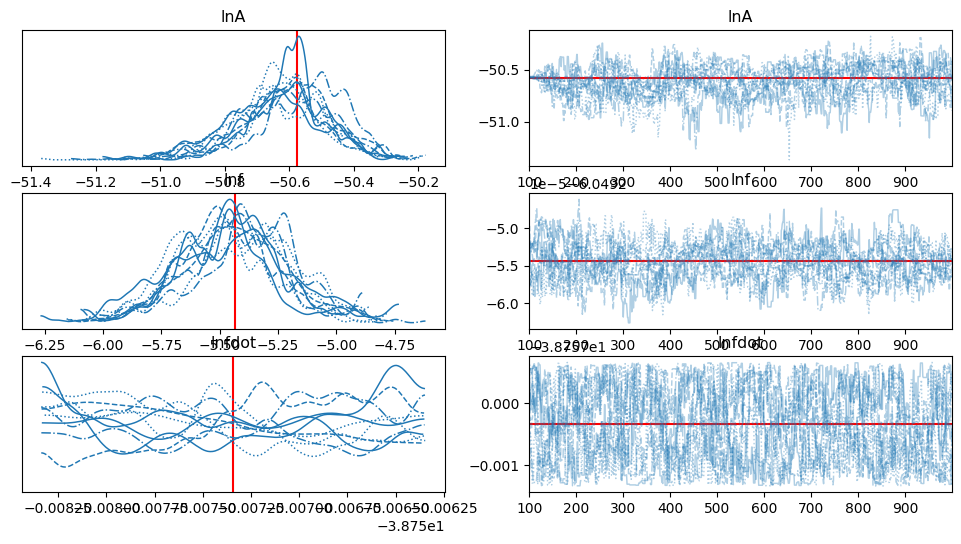